In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the datasets
train=pd.read_csv(r'D:\smartbridgepractice\walmart_dataset\train.csv')
features=pd.read_csv(r'D:\smartbridgepractice\walmart_dataset\features.csv')
stores=pd.read_csv(r'D:\smartbridgepractice\walmart_dataset\stores.csv')

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
train['Weekly_Sales'].mean()

15981.25812346704

In [6]:
train['Weekly_Sales'].max()

693099.36

In [7]:
train['Weekly_Sales'].min()

-4988.94

In [4]:
train.shape

(421570, 5)

In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
features.shape

(8190, 12)

In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
stores.shape

(45, 3)

In [4]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [10]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### Data preprocessing

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [14]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [15]:
# Checking for null values
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [16]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [17]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [18]:
df=train.merge(features,on=['Store','Date','IsHoliday'],how='inner').merge(stores,on=['Store'],how='inner')

In [19]:
df.shape

(421570, 16)

In [20]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [21]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [22]:
df['MarkDown1']=df['MarkDown1'].replace(np.nan,0)
df['MarkDown2']=df['MarkDown2'].replace(np.nan,0)
df['MarkDown3']=df['MarkDown3'].replace(np.nan,0)
df['MarkDown4']=df['MarkDown4'].replace(np.nan,0)
df['MarkDown5']=df['MarkDown5'].replace(np.nan,0)

In [23]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [24]:
df=df[df['Weekly_Sales']>=0]

In [25]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000
mean,22.195477,44.242771,16030.329773,60.090474,3.360888,2590.187246,878.803239,468.771234,1083.462694,1662.706138,171.212152,7.960077,136749.569176
std,12.787213,30.507197,22728.500149,18.448260,0.458523,6053.225499,5076.525234,5533.593112,3895.801513,4205.946641,39.162280,1.863873,60992.688568
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2117.560000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7659.090000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20268.380000,74.280000,3.738000,2801.500000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


### Data Visualization

<Axes: xlabel='Store', ylabel='count'>

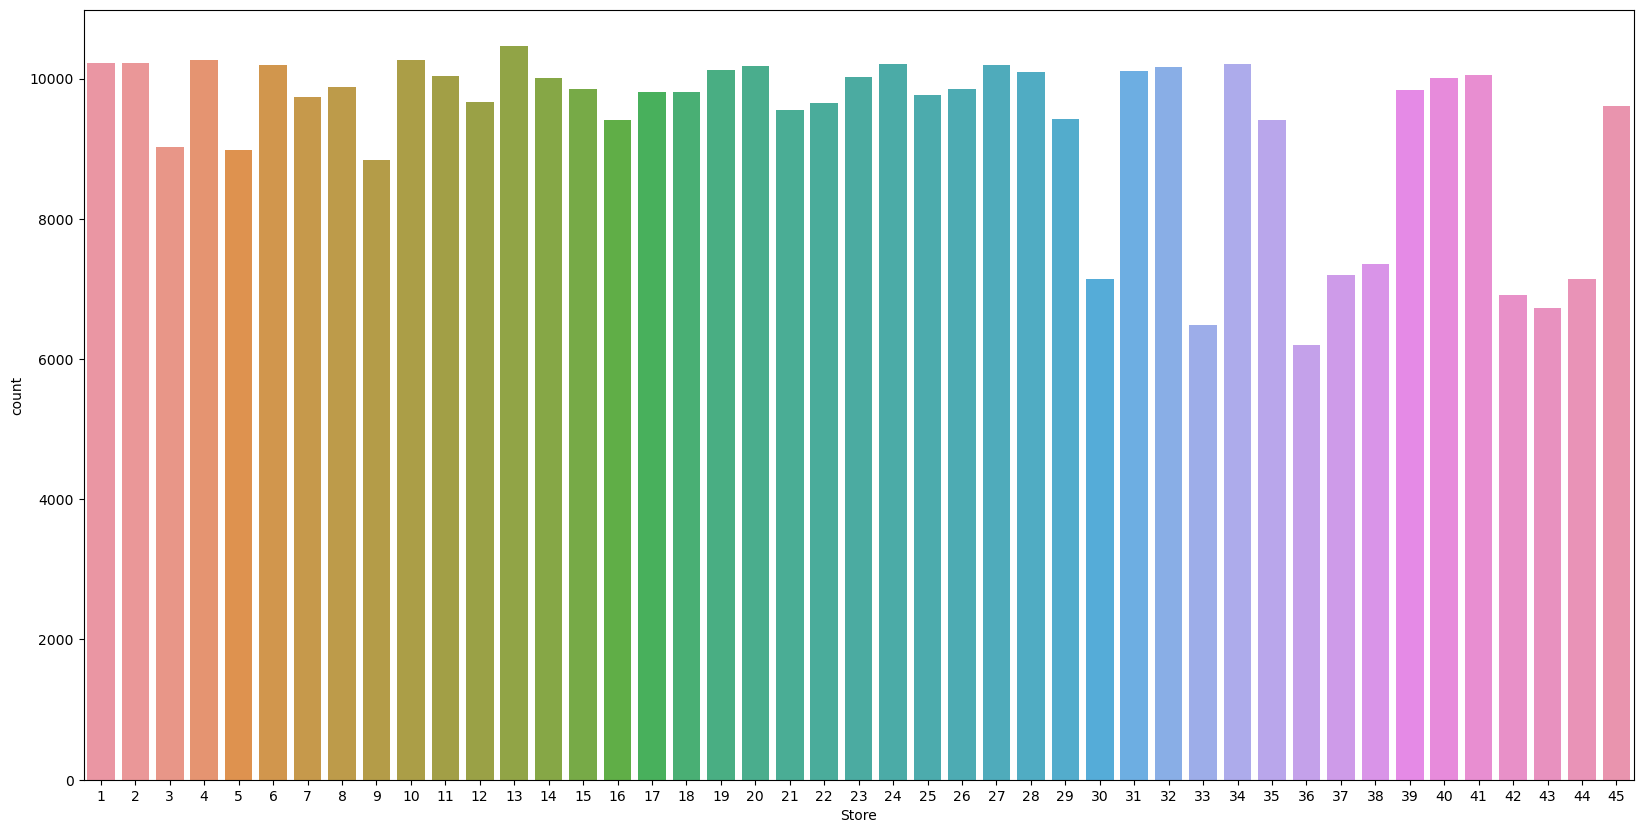

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x='Store',data=df,orient='h')

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

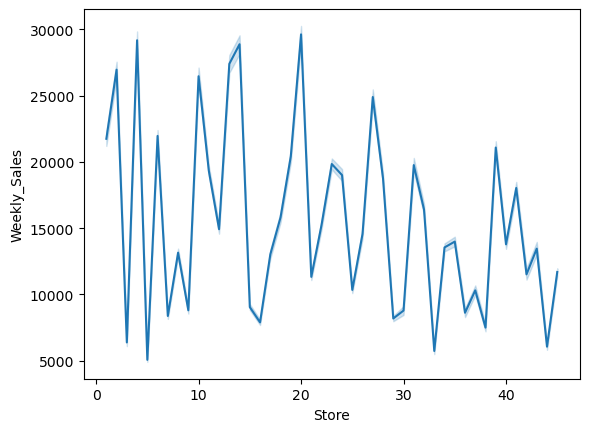

In [27]:
sns.lineplot(x='Store',y='Weekly_Sales',data=df)

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

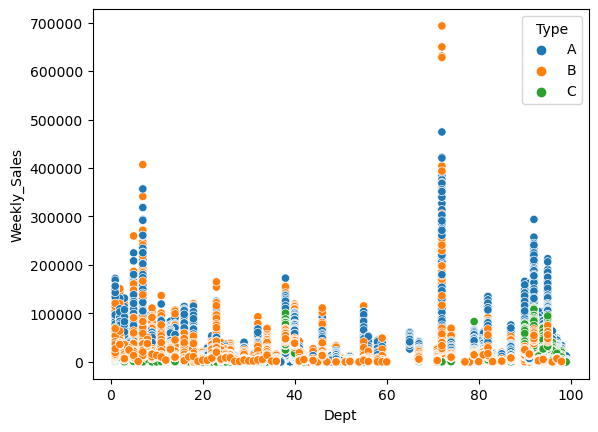

In [28]:
sns.scatterplot(x='Dept',y='Weekly_Sales',data=df,hue='Type')

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

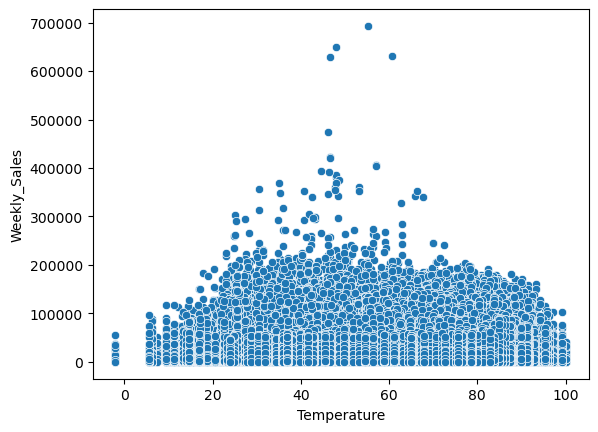

In [29]:
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=df)

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

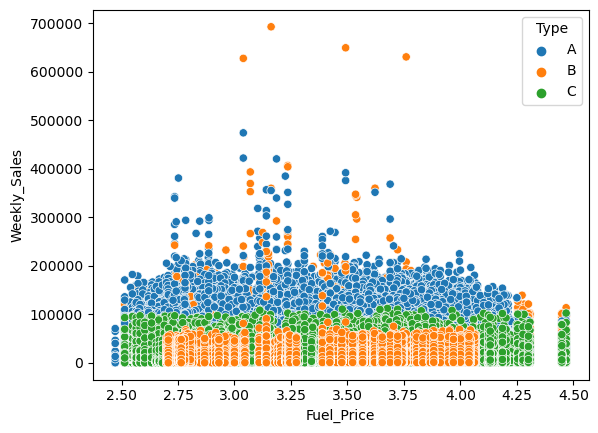

In [113]:
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=df,hue='Type')

<Axes: xlabel='MarkDown1', ylabel='Weekly_Sales'>

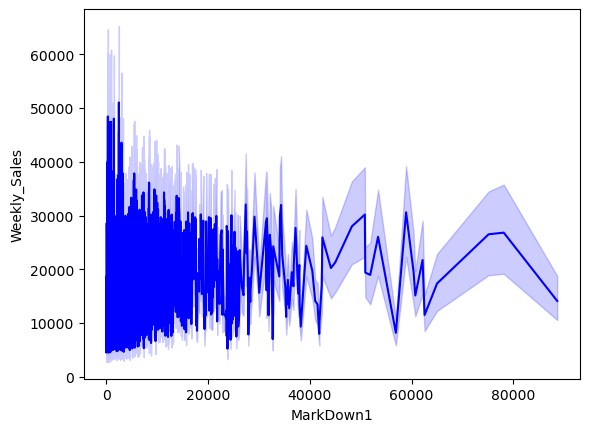

In [82]:
sns.lineplot(x='MarkDown1',y='Weekly_Sales',data=df,color='b')

<Axes: xlabel='MarkDown2', ylabel='Weekly_Sales'>

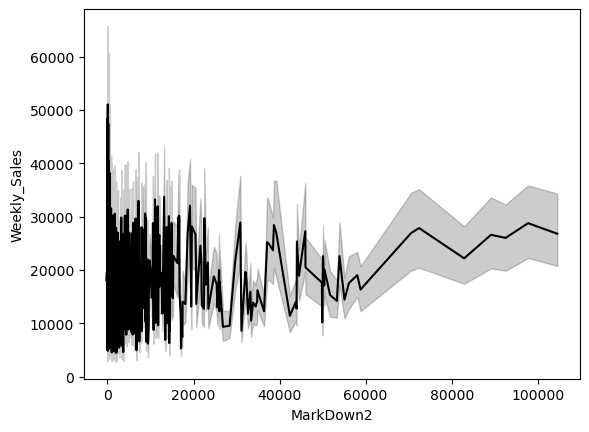

In [84]:
sns.lineplot(x='MarkDown2',y='Weekly_Sales',data=df,color='black')

<Axes: xlabel='MarkDown3', ylabel='Weekly_Sales'>

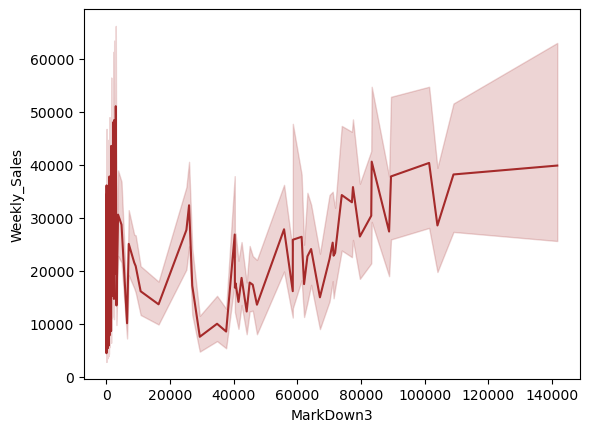

In [85]:
sns.lineplot(x='MarkDown3',y='Weekly_Sales',data=df,color='brown')

<Axes: xlabel='MarkDown4', ylabel='Weekly_Sales'>

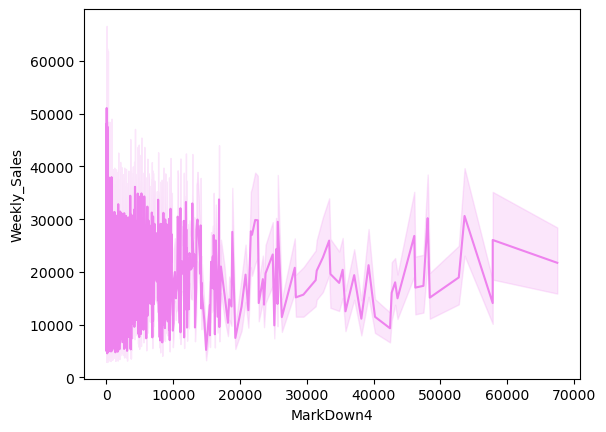

In [86]:
sns.lineplot(x='MarkDown4',y='Weekly_Sales',data=df,color='violet')

<Axes: xlabel='MarkDown5', ylabel='Weekly_Sales'>

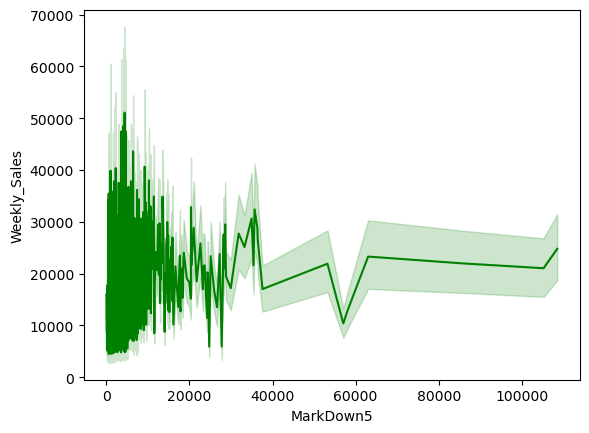

In [87]:
sns.lineplot(x='MarkDown5',y='Weekly_Sales',data=df,color='green')

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

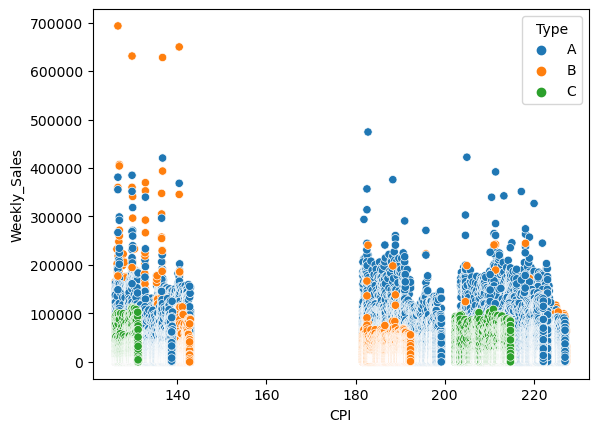

In [114]:
sns.scatterplot(x='CPI',y='Weekly_Sales',data=df,hue='Type')

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

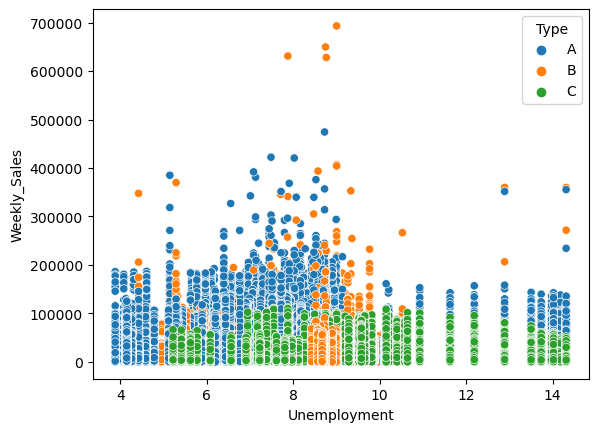

In [115]:
sns.scatterplot(x='Unemployment',y='Weekly_Sales',data=df,hue='Type')

<Axes: xlabel='Size', ylabel='Weekly_Sales'>

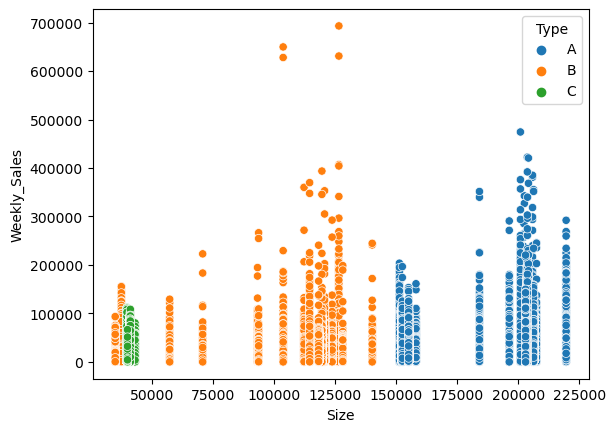

In [116]:
sns.scatterplot(x='Size',y='Weekly_Sales',data=df,hue='Type')

<Axes: xlabel='Dept', ylabel='count'>

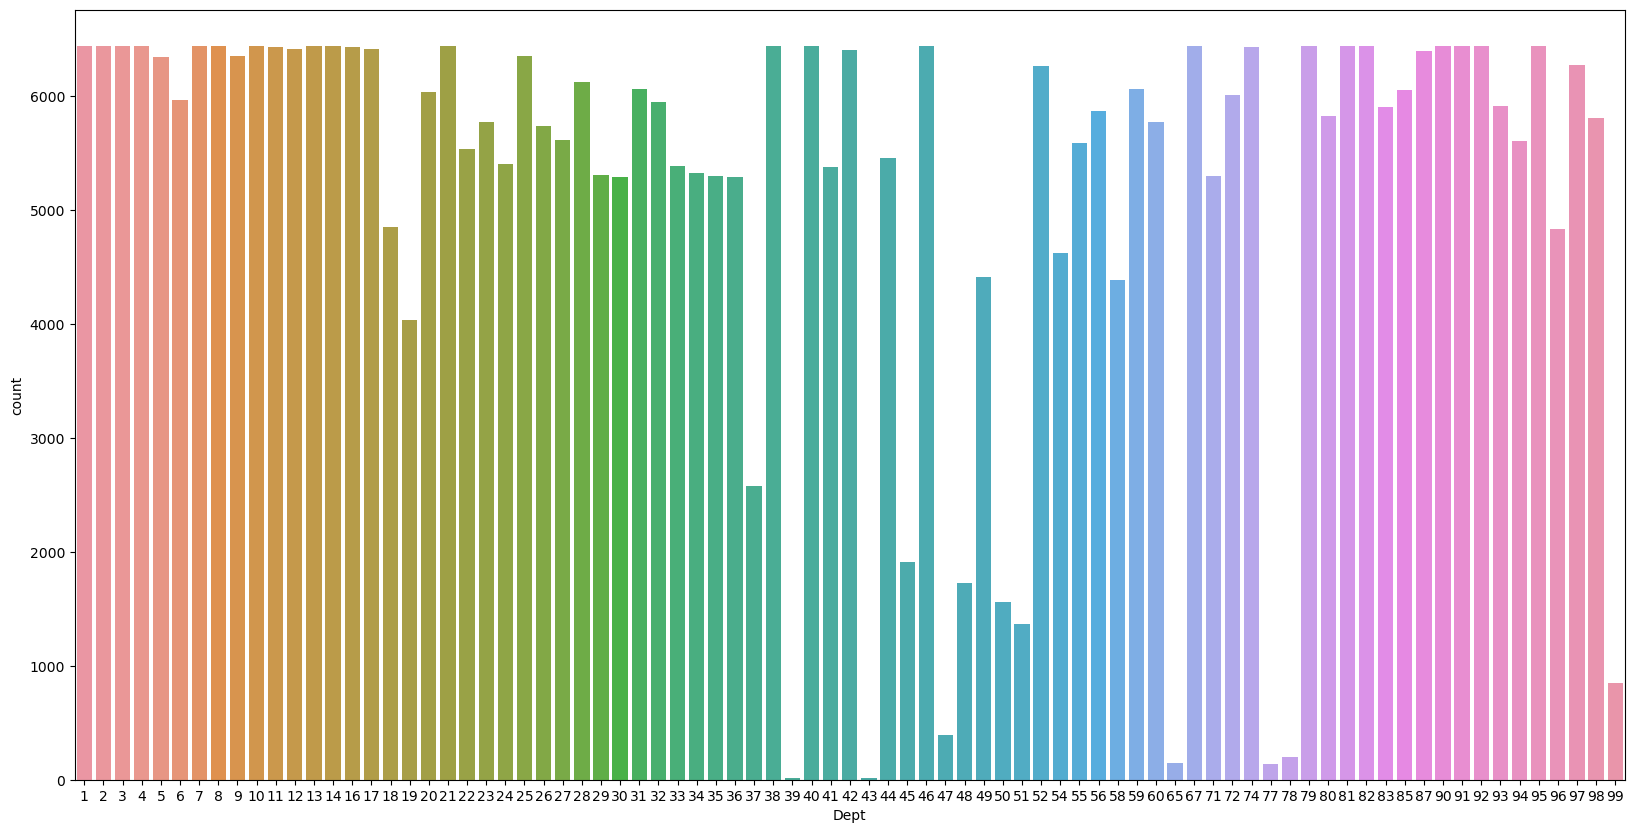

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x='Dept',data=df,orient='h')

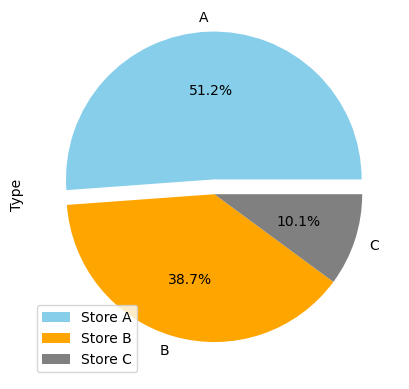

In [33]:
labels=['Store A','Store B','Store C']
df.Type.value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.1,0,0),colors=['skyblue','orange','grey'])
plt.legend(labels)

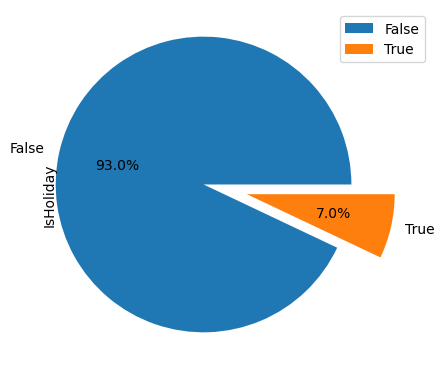

In [34]:
df.IsHoliday.value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.3,0))
plt.legend()

<Axes: xlabel='Temperature', ylabel='Count'>

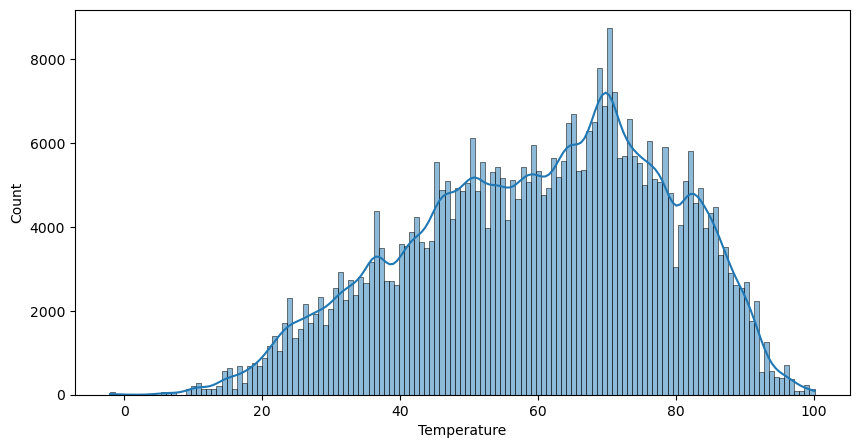

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(x='Temperature',data=df,kde='True')

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

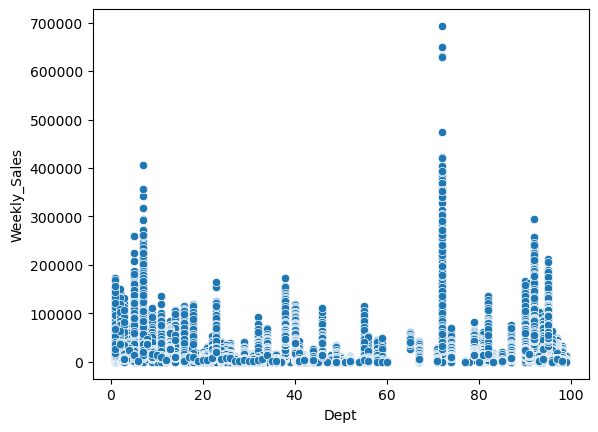

In [36]:
sns.scatterplot(x='Dept',y='Weekly_Sales',data=df)

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

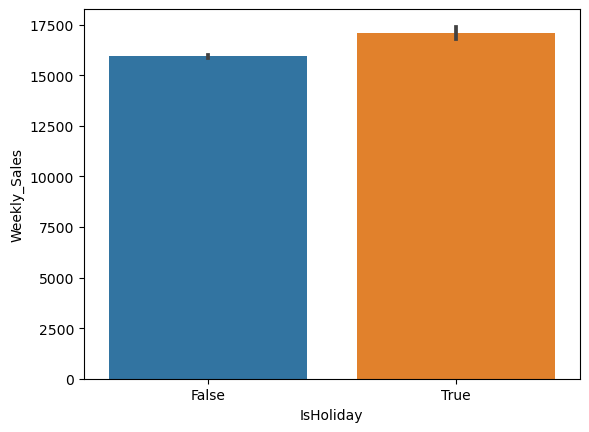

In [37]:
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=df)

In [166]:
cor=df.corr()
cor

C:\Temp\ipykernel_5232\3865792743.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024236,-0.085099,-0.000511,-0.050226,0.065296,-0.059948,-0.033727,-0.020299,-0.042792,-0.012595,-0.211240,0.208753,-0.182784
Dept,0.024236,1.000000,0.148704,0.000662,0.004718,0.003543,0.001444,0.000428,0.001514,0.001872,0.002754,-0.007172,0.007785,-0.002471
Weekly_Sales,-0.085099,0.148704,1.000000,0.012856,-0.002333,0.000092,0.047260,0.020961,0.038530,0.037481,0.050612,-0.021153,-0.025831,0.244089
IsHoliday,-0.000511,0.000662,0.012856,1.000000,-0.155779,-0.078140,-0.003522,0.207314,0.266718,0.011621,-0.015189,-0.001946,0.010540,0.000786
Temperature,-0.050226,0.004718,-0.002333,-0.155779,1.000000,0.143718,-0.026426,-0.179669,-0.056010,-0.050310,-0.014836,0.182191,0.096792,-0.058414
Fuel_Price,0.065296,0.003543,0.000092,-0.078140,0.143718,1.000000,0.297084,0.029288,0.018645,0.166654,0.215597,-0.164207,-0.033897,0.003620
MarkDown1,-0.059948,0.001444,0.047260,-0.003522,-0.026426,0.297084,1.000000,0.175019,-0.014422,0.838862,0.415287,0.010927,-0.105259,0.169876
MarkDown2,-0.033727,0.000428,0.020961,0.207314,-0.179669,0.029288,0.175019,1.000000,-0.006088,0.113458,0.131853,-0.003685,-0.041504,0.078387
MarkDown3,-0.020299,0.001514,0.038530,0.266718,-0.056010,0.018645,-0.014422,-0.006088,1.000000,-0.012029,0.042544,-0.005958,-0.018080,0.033670
MarkDown4,-0.042792,0.001872,0.037481,0.011621,-0.050310,0.166654,0.838862,0.113458,-0.012029,1.000000,0.303553,-0.002050,-0.076589,0.127411


<Axes: >

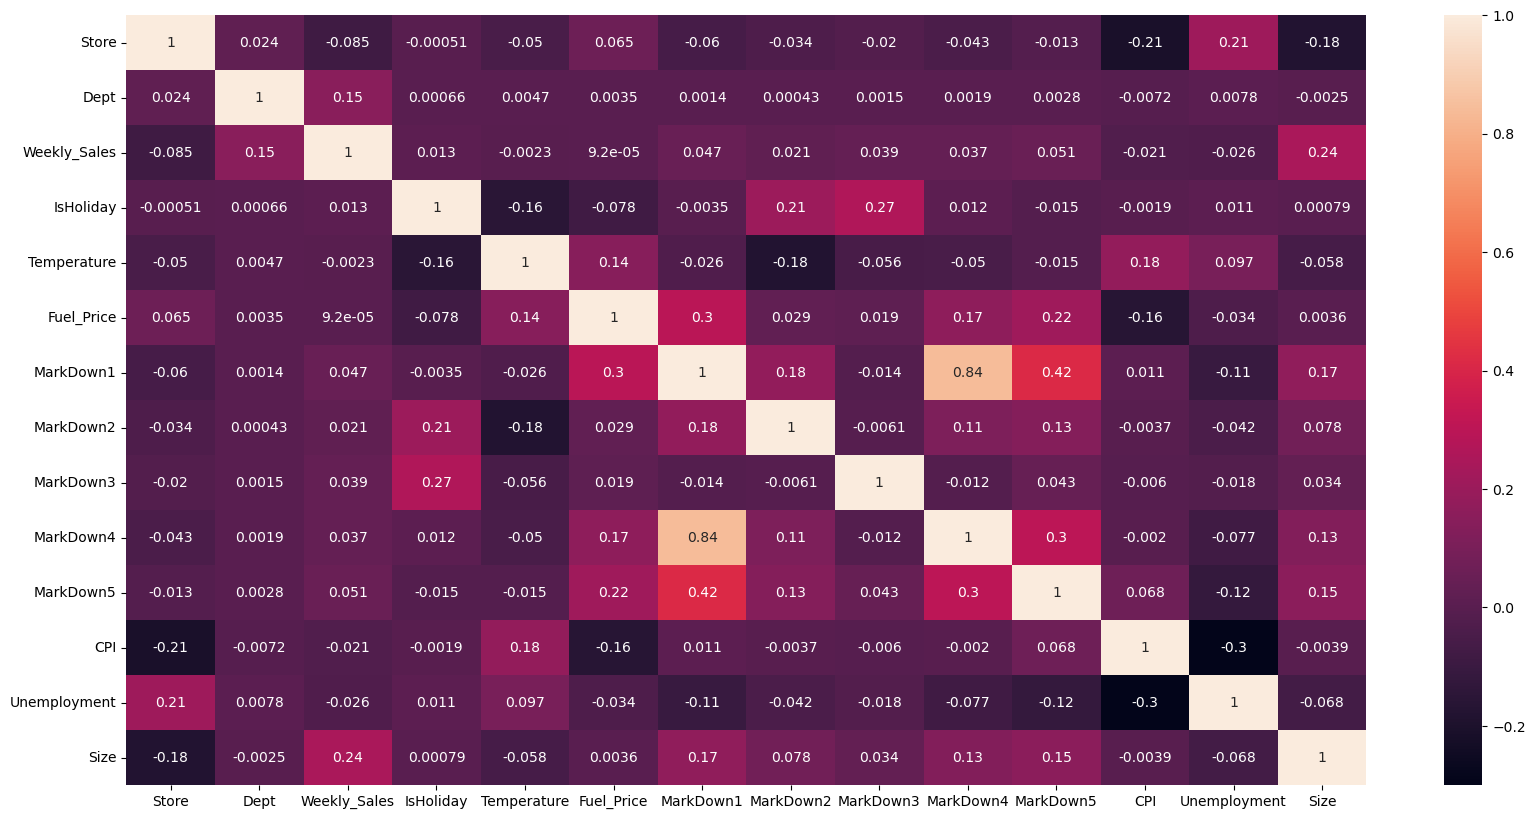

In [167]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

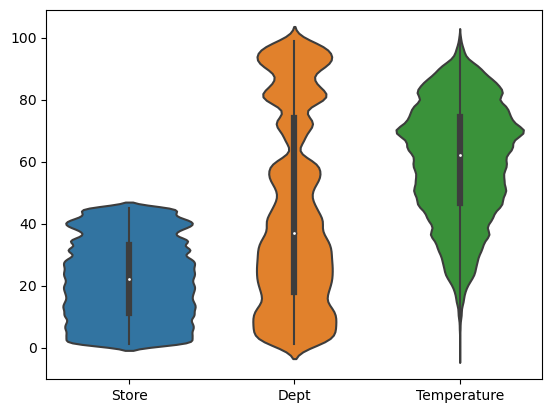

In [40]:
df1=[df.Store,df.Dept,df.Temperature]
sns.violinplot(df1)
plt.xticks([0,1,2],labels=['Store','Dept','Temperature'])
plt.show()

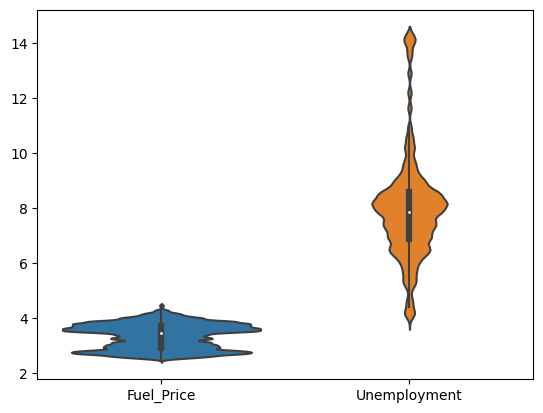

In [41]:
df2=[df.Fuel_Price,df.Unemployment]
sns.violinplot(df2)
plt.xticks([0,1],labels=['Fuel_Price','Unemployment'])
plt.show()

<Axes: >

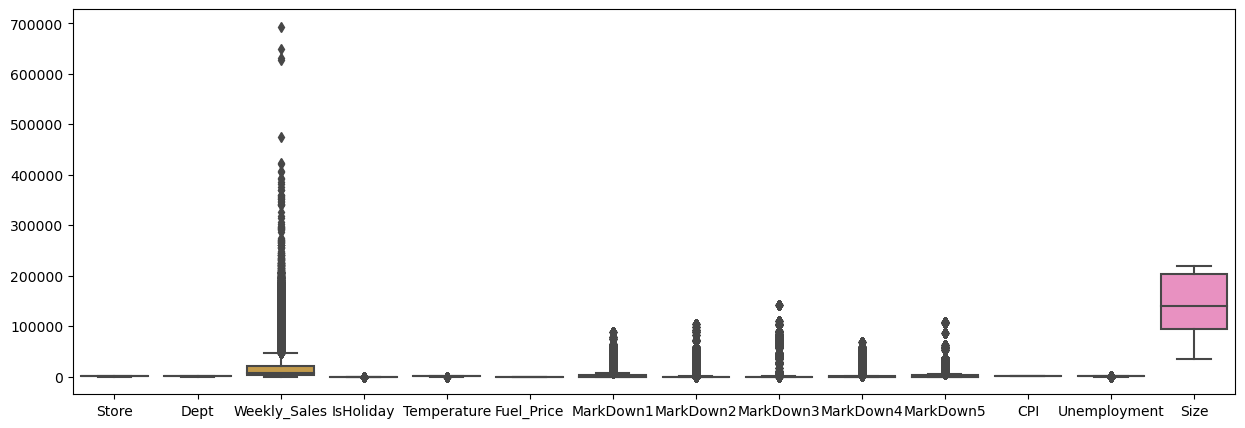

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(df)

In [26]:
# Splitting the date
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week
df['Day_of_week']=df['Date'].dt.day_name()

In [27]:
df[['Date','Month','Year','Week','Day_of_week']].head()

,Date,Month,Year,Week,Day_of_week
0,2010-02-05,2,2010,5,Friday
1,2010-02-05,2,2010,5,Friday
2,2010-02-05,2,2010,5,Friday
3,2010-02-05,2,2010,5,Friday
4,2010-02-05,2,2010,5,Friday


In [28]:
df["IsHoliday"] = df["IsHoliday"].apply(lambda x: 1 if x==True else 0)

In [29]:
Type_dummies = pd.get_dummies(df["Type"])
df = pd.concat([df,Type_dummies],axis=1)
df.drop("Type",axis=1,inplace=True)

In [30]:
df['is_weekend']=np.where(df['Day_of_week'].isin(['Sunday','Saturday']),1,0)

In [31]:
df[['Date','is_weekend']].head()

,Date,is_weekend
0,2010-02-05,0
1,2010-02-05,0
2,2010-02-05,0
3,2010-02-05,0
4,2010-02-05,0


In [32]:
df.drop(columns=['Day_of_week'],inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Dept          420285 non-null  int64         
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  int64         
 5   Temperature   420285 non-null  float64       
 6   Fuel_Price    420285 non-null  float64       
 7   MarkDown1     420285 non-null  float64       
 8   MarkDown2     420285 non-null  float64       
 9   MarkDown3     420285 non-null  float64       
 10  MarkDown4     420285 non-null  float64       
 11  MarkDown5     420285 non-null  float64       
 12  CPI           420285 non-null  float64       
 13  Unemployment  420285 non-null  float64       
 14  Size          420285 non-null  int64         
 15  Month         420

In [34]:
print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50          0        42.31       2.572   
1      1     2 2010-02-05      50605.27          0        42.31       2.572   
2      1     3 2010-02-05      13740.12          0        42.31       2.572   
3      1     4 2010-02-05      39954.04          0        42.31       2.572   
4      1     5 2010-02-05      32229.38          0        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  ...         CPI  Unemployment    Size  \
0        0.0        0.0        0.0  ...  211.096358         8.106  151315   
1        0.0        0.0        0.0  ...  211.096358         8.106  151315   
2        0.0        0.0        0.0  ...  211.096358         8.106  151315   
3        0.0        0.0        0.0  ...  211.096358         8.106  151315   
4        0.0        0.0        0.0  ...  211.096358         8.106  151315   

   Month  Year  Week  A  B  C  is_weekend  
0      2  2010    

In [35]:
df.to_csv('merged_data.csv',index=False)

In [53]:
sum_sales_week=df.groupby('Week')['Weekly_Sales'].sum()

<Axes: xlabel='Week'>

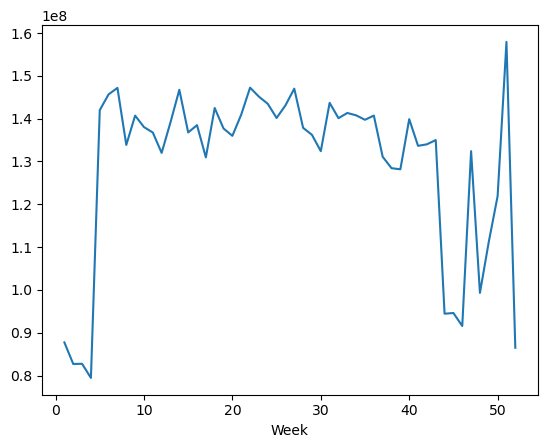

In [54]:
sum_sales_week.plot()

In [55]:
sum_sales_date = df.groupby(by='Date')['Weekly_Sales'].aggregate('sum')

<Axes: xlabel='Date'>

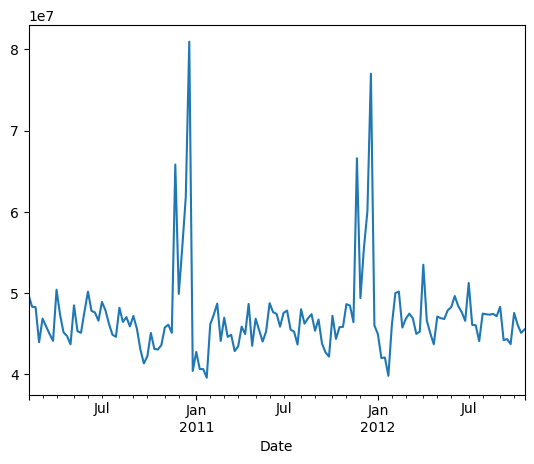

In [56]:
sum_sales_date.plot()

### Importing the new dataset

In [2]:
df1=pd.read_csv(r'D:\smartbridgepractice\walmart_dataset\merged_data.csv',keep_default_na=False,na_values=[""])

In [154]:
cor1=df1.corr()

C:\Temp\ipykernel_10836\2213093391.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor1=df1.corr()


In [155]:
cor1

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Size,Month,Year,Week,A,B,C,is_weekend
Store,1.000000,0.024236,-0.085099,-0.000511,-0.050226,0.065296,-0.059948,-0.033727,-0.020299,-0.042792,...,-0.211240,0.208753,-0.182784,0.000926,0.002833,0.000943,-0.037109,-0.233528,0.438991,NaN
Dept,0.024236,1.000000,0.148704,0.000662,0.004718,0.003543,0.001444,0.000428,0.001514,0.001872,...,-0.007172,0.007785,-0.002471,0.000795,0.003711,0.000763,0.013006,-0.031002,0.028538,NaN
Weekly_Sales,-0.085099,0.148704,1.000000,0.012856,-0.002333,0.000092,0.047260,0.020961,0.038530,0.037481,...,-0.021153,-0.025831,0.244089,0.028431,-0.010004,0.027689,0.185269,-0.130933,-0.095635,NaN
IsHoliday,-0.000511,0.000662,0.012856,1.000000,-0.155779,-0.078140,-0.003522,0.207314,0.266718,0.011621,...,-0.001946,0.010540,0.000786,0.123064,-0.056571,0.127853,0.000695,-0.000072,-0.001036,NaN
Temperature,-0.050226,0.004718,-0.002333,-0.155779,1.000000,0.143718,-0.026426,-0.179669,-0.056010,-0.050310,...,0.182191,0.096792,-0.058414,0.236015,0.065720,0.236314,0.024410,-0.108977,0.135655,NaN
Fuel_Price,0.065296,0.003543,0.000092,-0.078140,0.143718,1.000000,0.297084,0.029288,0.018645,0.166654,...,-0.164207,-0.033897,0.003620,-0.040884,0.779673,-0.031146,-0.037745,0.037110,0.002619,NaN
MarkDown1,-0.059948,0.001444,0.047260,-0.003522,-0.026426,0.297084,1.000000,0.175019,-0.014422,0.838862,...,0.010927,-0.105259,0.169876,-0.089250,0.501073,-0.093627,0.086643,-0.004901,-0.135773,NaN
MarkDown2,-0.033727,0.000428,0.020961,0.207314,-0.179669,0.029288,0.175019,1.000000,-0.006088,0.113458,...,-0.003685,-0.041504,0.078387,-0.019604,0.132030,-0.013071,0.040871,-0.008202,-0.054526,NaN
MarkDown3,-0.020299,0.001514,0.038530,0.266718,-0.056010,0.018645,-0.014422,-0.006088,1.000000,-0.012029,...,-0.005958,-0.018080,0.033670,0.116096,0.006803,0.122393,0.015076,0.001911,-0.028092,NaN
MarkDown4,-0.042792,0.001872,0.037481,0.011621,-0.050310,0.166654,0.838862,0.113458,-0.012029,1.000000,...,-0.002050,-0.076589,0.127411,-0.105590,0.335369,-0.114199,0.063789,-0.008059,-0.092765,NaN


In [156]:
df1.shape

(420285, 22)

In [157]:
df1.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Month', 'Year', 'Week',
       'A', 'B', 'C', 'is_weekend'],
      dtype='object')

### Splitting dependent and independent variables

In [3]:
x=df1.drop(columns=['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Fuel_Price','is_weekend','Unemployment'],axis=1).set_index('Date')

In [4]:
x.head()

,Store,Dept,IsHoliday,Temperature,CPI,Size,Month,Year,Week,A,B,C
Date,,,,,,,,,,,,
2010-02-05,1,1,0,42.31,211.096358,151315,2,2010,5,1,0,0
2010-02-05,1,2,0,42.31,211.096358,151315,2,2010,5,1,0,0
2010-02-05,1,3,0,42.31,211.096358,151315,2,2010,5,1,0,0
2010-02-05,1,4,0,42.31,211.096358,151315,2,2010,5,1,0,0
2010-02-05,1,5,0,42.31,211.096358,151315,2,2010,5,1,0,0


In [5]:
type(x)

pandas.core.frame.DataFrame

In [6]:
x.shape

(420285, 12)

In [7]:
y=df1.Weekly_Sales

In [8]:
type(y)

pandas.core.series.Series

In [9]:
y.head()

0    24924.50
1    50605.27
2    13740.12
3    39954.04
4    32229.38
Name: Weekly_Sales, dtype: float64

In [10]:
y.shape

(420285,)

### Training and splitting

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((336228, 12), (84057, 12), (336228,), (84057,))

In [13]:
x_test.head()

,Store,Dept,IsHoliday,Temperature,CPI,Size,Month,Year,Week,A,B,C
Date,,,,,,,,,,,,
2010-02-12,32,2,1,28.09,189.464272,203007,2,2010,6,1,0,0
2010-09-03,6,48,0,82.15,213.051922,202505,9,2010,35,1,0,0
2010-05-14,16,27,0,41.26,189.490412,57197,5,2010,19,0,1,0
2012-05-04,29,4,0,50.75,138.033200,93638,5,2012,18,0,1,0
2012-03-09,10,38,0,57.65,130.741379,126512,3,2012,10,0,1,0


### Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50, max_depth=25, min_samples_split=3, min_samples_leaf=1)

In [15]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_split=3, n_estimators=50)

In [21]:
y_pred=rf.predict(x_test)

In [171]:
y_pred

array([44697.46318238,  1758.48044314,   550.71200952, ...,
        5584.01297101, 23898.1777103 , 13821.02043746])

In [172]:
Sales=pd.DataFrame({"Actual_Sales":y_test,"Predicted_Sales":y_pred})

In [173]:
Sales

,Actual_Sales,Predicted_Sales
303054,45614.64,44697.463182
50887,1785.00,1758.480443
148579,615.00,550.712010
284046,14664.92,14701.247678
95260,104733.40,116691.092112
...,...,...
140156,10053.76,9218.671834
277261,4658.50,4213.778056
300902,5250.46,5584.012971
419414,24109.08,23898.177710


In [20]:
from sklearn import metrics

In [175]:
print("MSE:", metrics.mean_squared_error(y_test,y_pred))

MSE: 12083384.617536364


In [176]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 3476.116312429198


In [177]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

MAE: 1417.3229688475956


In [178]:
print('Training accuracy:',rf.score(x_train,y_train)*100,'%')

Training accuracy: 99.55573406450291 %


In [179]:
print('Testing accuracy:',rf.score(x_test,y_test)*100,'%')

Testing accuracy: 97.6772493174347 %


In [22]:
print(metrics.r2_score(y_test, y_pred))

0.9746164931311113


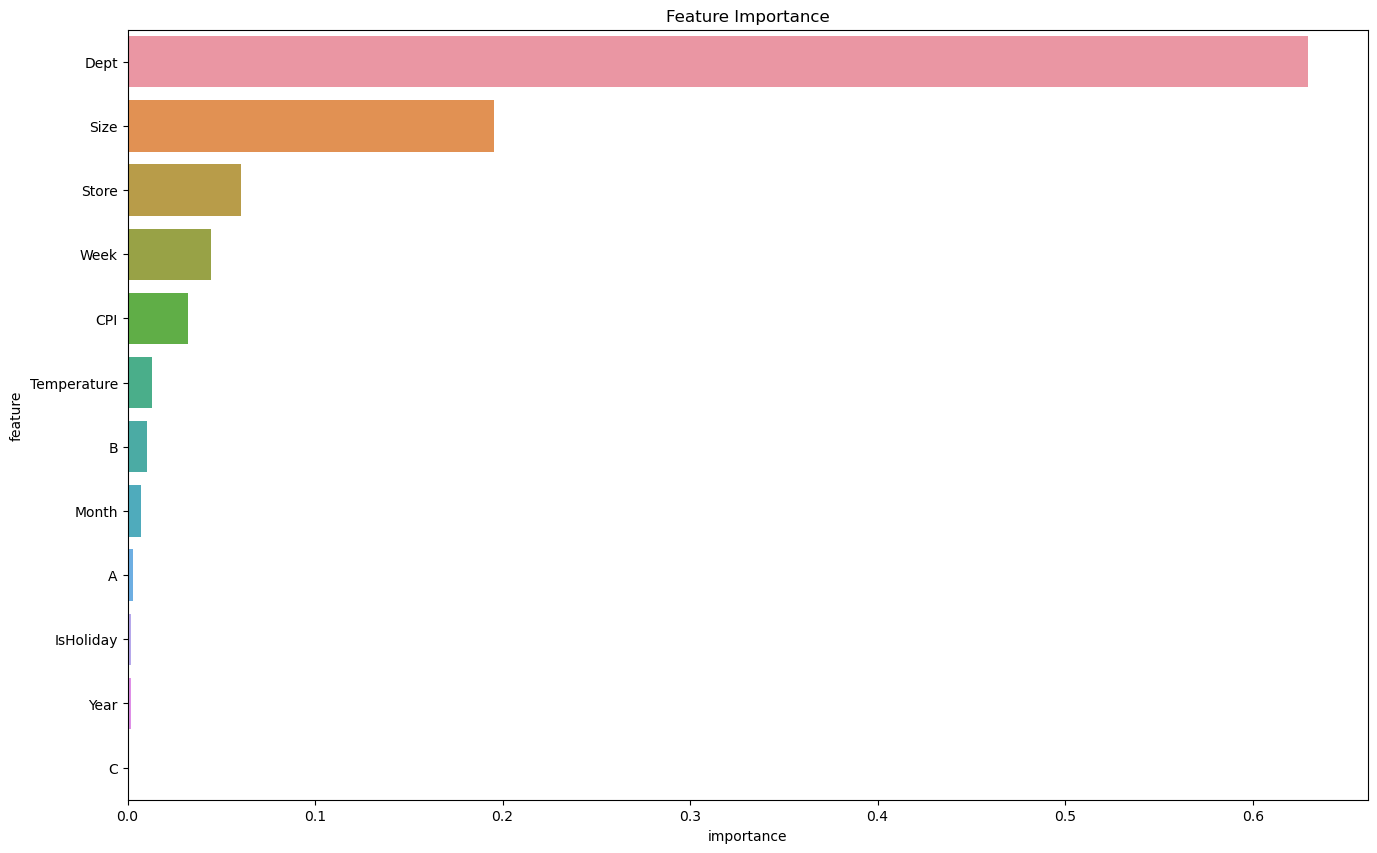

In [180]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

### Multilinear Regression

In [183]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [184]:
lr.fit(x_train,y_train)

LinearRegression()

In [185]:
y_pred1=lr.predict(x_test)

In [186]:
y_pred1

array([15568.25169601, 24702.59550914,  5780.07348781, ...,
       18100.2690176 ,  5633.45362669, 13179.87524301])

In [187]:
Sales1=pd.DataFrame({"Actual_Sales":y_test,"Predicted_Sales":y_pred1})

In [188]:
Sales1

,Actual_Sales,Predicted_Sales
303054,45614.64,15568.251696
50887,1785.00,24702.595509
148579,615.00,5780.073488
284046,14664.92,6095.517097
95260,104733.40,15552.112927
...,...,...
140156,10053.76,14316.957232
277261,4658.50,8854.120131
300902,5250.46,18100.269018
419414,24109.08,5633.453627


In [189]:
print("MSE:", metrics.mean_squared_error(y_test,y_pred1))

MSE: 473187594.6754388


In [190]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

RMSE: 21752.87554957824


In [191]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred1))

MAE: 14590.21047948332


In [192]:
print('Training accuracy:',lr.score(x_train,y_train)*100,'%')

Training accuracy: 8.921149189364153 %


In [193]:
print('Testing accuracy:',lr.score(x_test,y_test)*100,'%')

Testing accuracy: 9.040650173568899 %


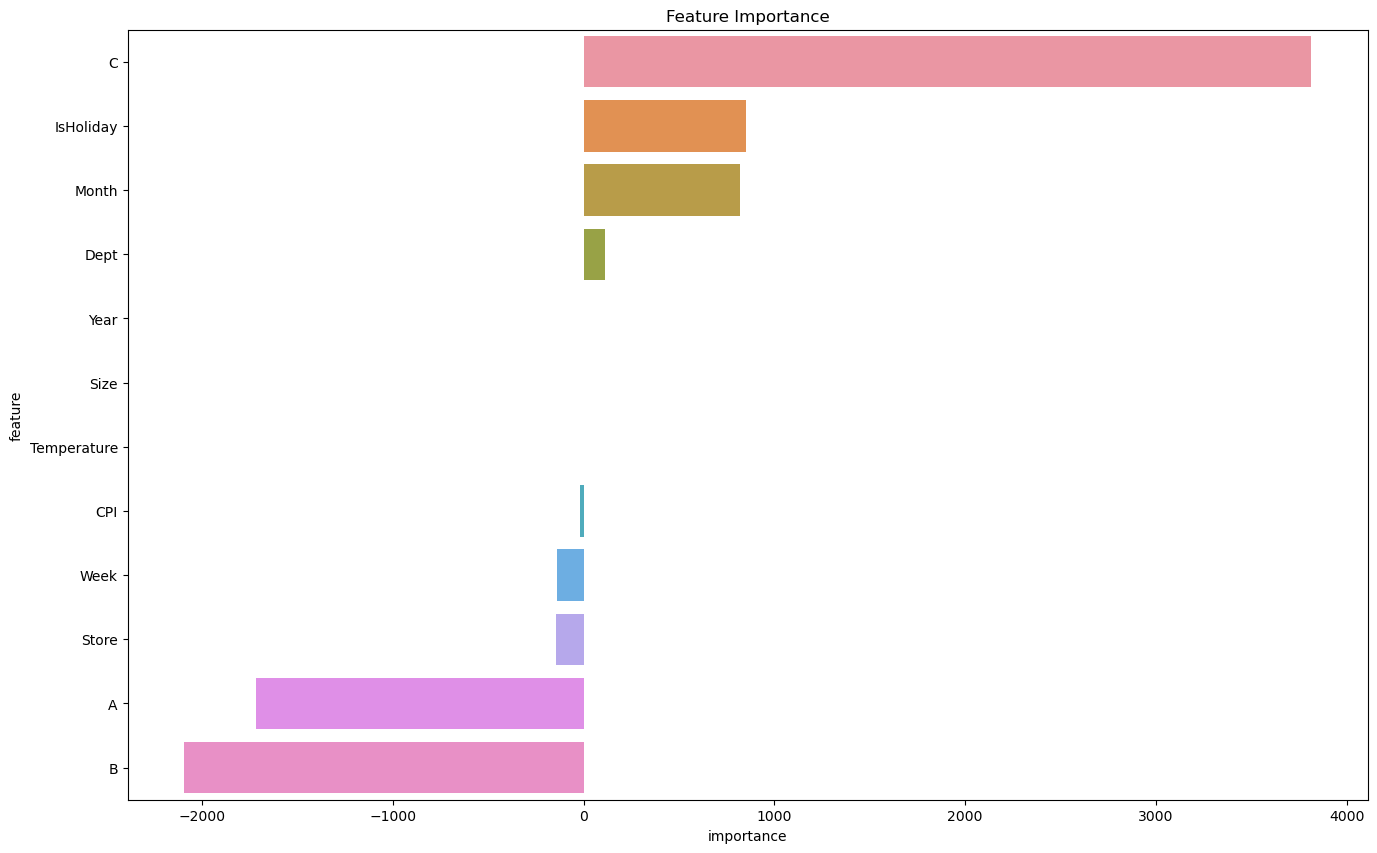

In [194]:
importance_df_1 = pd.DataFrame({
    'feature': x_train.columns,
    'importance': lr.coef_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df_1, x='importance', y='feature');

### XGBoost Regressor

In [197]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=4,
    learning_rate=0.5,
    subsample=0.7,
    colsample_bytree=0.8,
    n_estimators=500
)

In [198]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [199]:
y_pred2=xg_reg.predict(x_test)

In [200]:
y_pred2

array([50868.79   ,  2087.4429 ,  -511.77615, ...,  7959.5977 ,
       22265.502  , 18409.15   ], dtype=float32)

In [201]:
Sales2=pd.DataFrame({"Actual_Sales":y_test,"Predicted_Sales":y_pred2})

In [202]:
Sales2

,Actual_Sales,Predicted_Sales
303054,45614.64,50868.789062
50887,1785.00,2087.442871
148579,615.00,-511.776154
284046,14664.92,13135.656250
95260,104733.40,92585.078125
...,...,...
140156,10053.76,9419.869141
277261,4658.50,2492.073730
300902,5250.46,7959.597656
419414,24109.08,22265.501953


In [203]:
print("MSE:", metrics.mean_squared_error(y_test,y_pred2))

MSE: 29495043.80771495


In [204]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

RMSE: 5430.933971953162


In [205]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred2))

MAE: 3217.018649656249


In [206]:
print('Training accuracy:',xg_reg.score(x_train,y_train)*100,'%')

Training accuracy: 94.46029273592262 %


In [207]:
print('Testing accuracy:',xg_reg.score(x_test,y_test)*100,'%')

Testing accuracy: 94.33026132121653 %


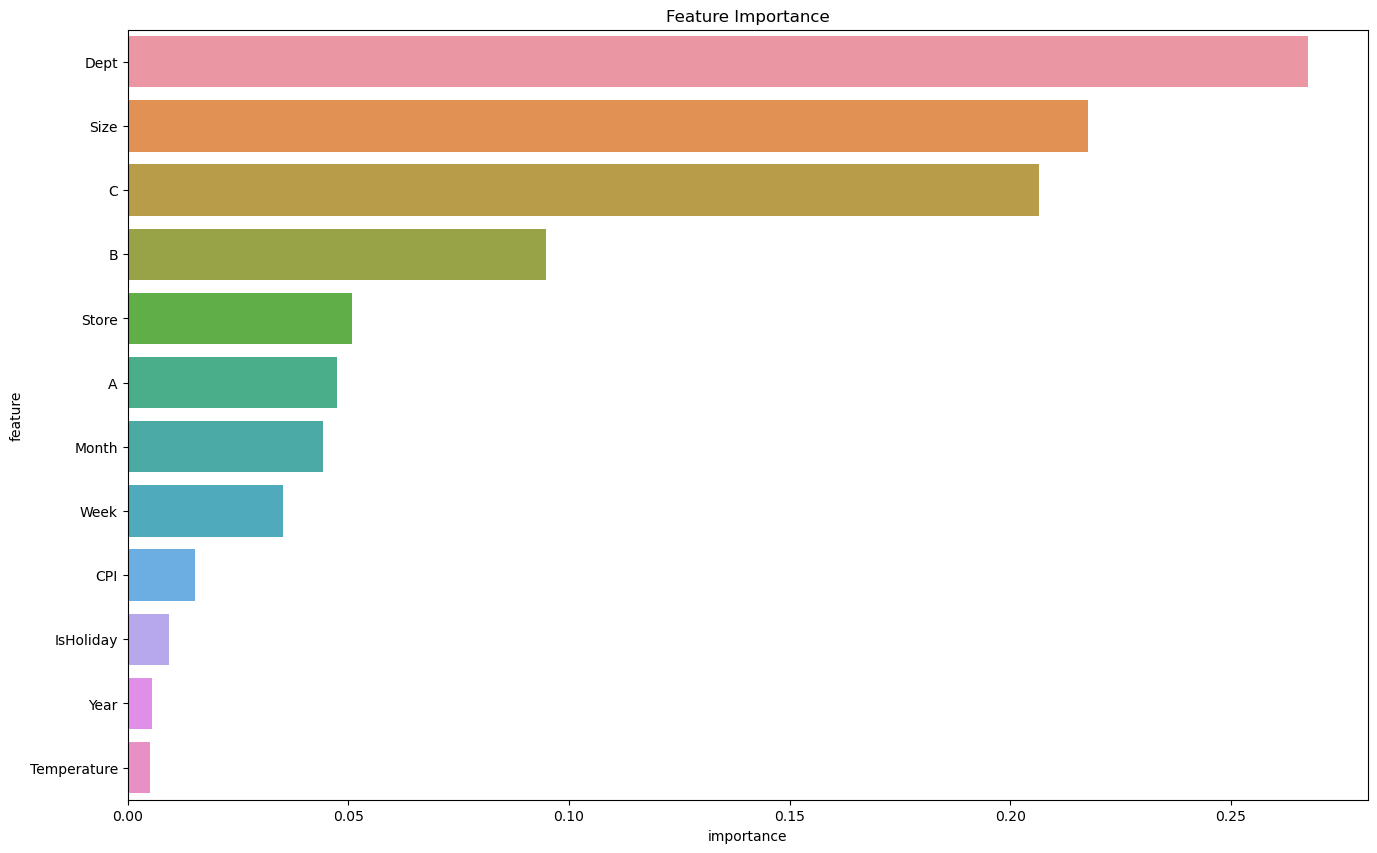

In [208]:
importance_df_2 = pd.DataFrame({
    'feature': x_train.columns,
    'importance': xg_reg.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df_2, x='importance', y='feature');

### ExtraTrees Regressor

In [211]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=50, bootstrap = True, random_state = 0)

In [212]:
etr.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=True, n_estimators=50, random_state=0)

In [213]:
y_pred3=etr.predict(x_test)

In [214]:
y_pred3

array([43946.6124,  1765.26  ,   533.7936, ...,  5666.992 , 23807.1126,
       14927.2844])

In [215]:
Sales3=pd.DataFrame({"Actual_Sales":y_test,"Predicted_Sales":y_pred3})

In [216]:
Sales3

,Actual_Sales,Predicted_Sales
303054,45614.64,43946.6124
50887,1785.00,1765.2600
148579,615.00,533.7936
284046,14664.92,15621.4218
95260,104733.40,108747.4884
...,...,...
140156,10053.76,9328.5390
277261,4658.50,4340.6016
300902,5250.46,5666.9920
419414,24109.08,23807.1126


In [217]:
print("MSE:", metrics.mean_squared_error(y_test,y_pred3))

MSE: 13332242.348159866


In [218]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

RMSE: 3651.334324347726


In [219]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred3))

MAE: 1489.126706896511


In [220]:
print('Training accuracy:',etr.score(x_train,y_train)*100,'%')

Training accuracy: 99.59519013556873 %


In [221]:
print('Testing accuracy:',etr.score(x_test,y_test)*100,'%')

Testing accuracy: 97.43718535869728 %


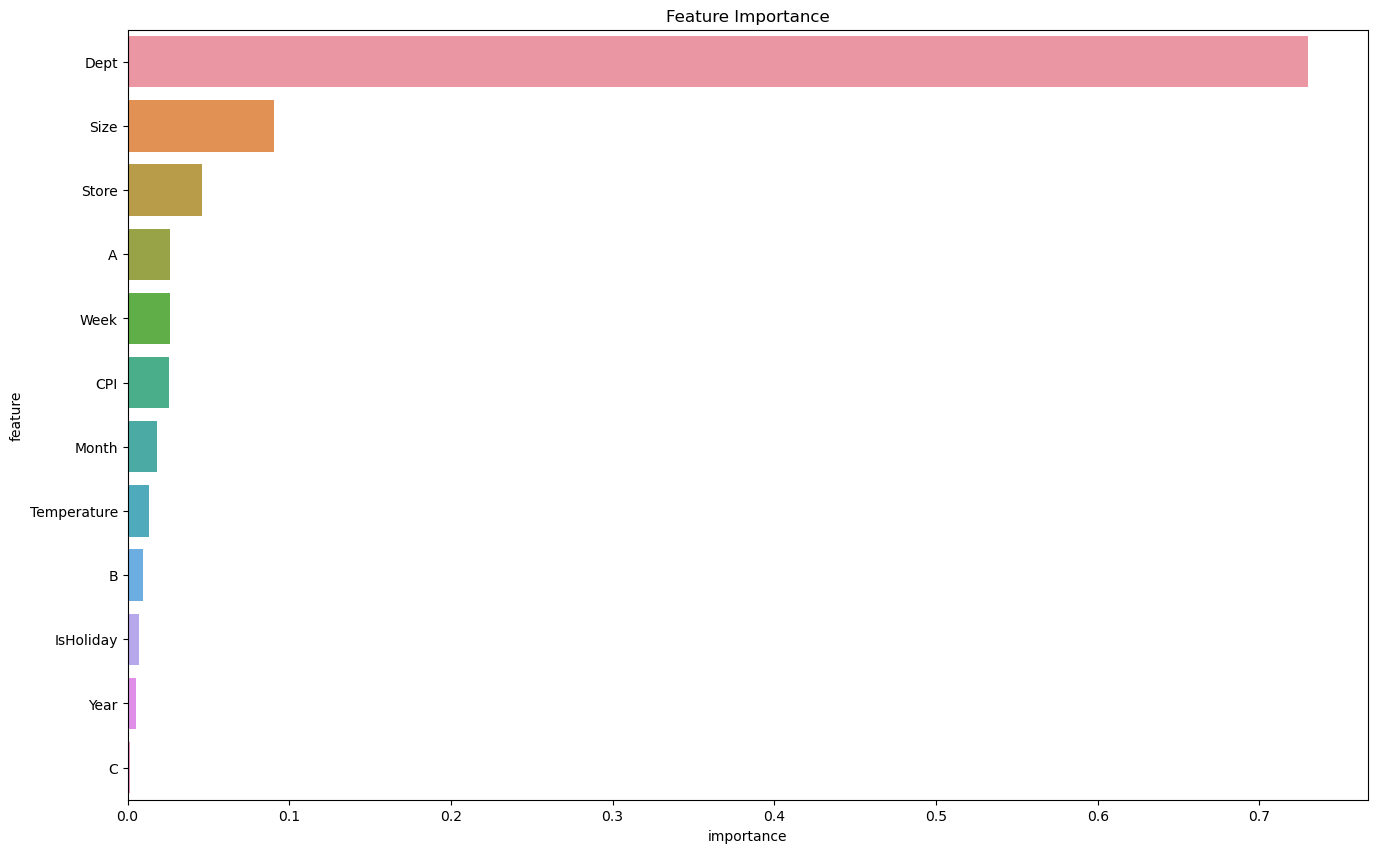

In [222]:
importance_df_3 = pd.DataFrame({
    'feature': x_train.columns,
    'importance': etr.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df_3, x='importance', y='feature');

### ARIMA

In [223]:
import pmdarima
from pmdarima.arima import auto_arima

In [224]:
df2=pd.read_csv(r'D:\smartbridgepractice\walmart_dataset\merged_data.csv',keep_default_na=False,na_values=[""])

In [225]:
df2.Date = pd.to_datetime(df2.Date,format='%Y-%m-%d')
df2.index = df2.Date
df2 = df2.drop('Date', axis=1)
df2 = df2.resample('MS').mean() 

In [226]:
train_data = df2[:int(0.7*(len(df2)))]
test_data = df2[int(0.7*(len(df2))):]

In [227]:
train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']

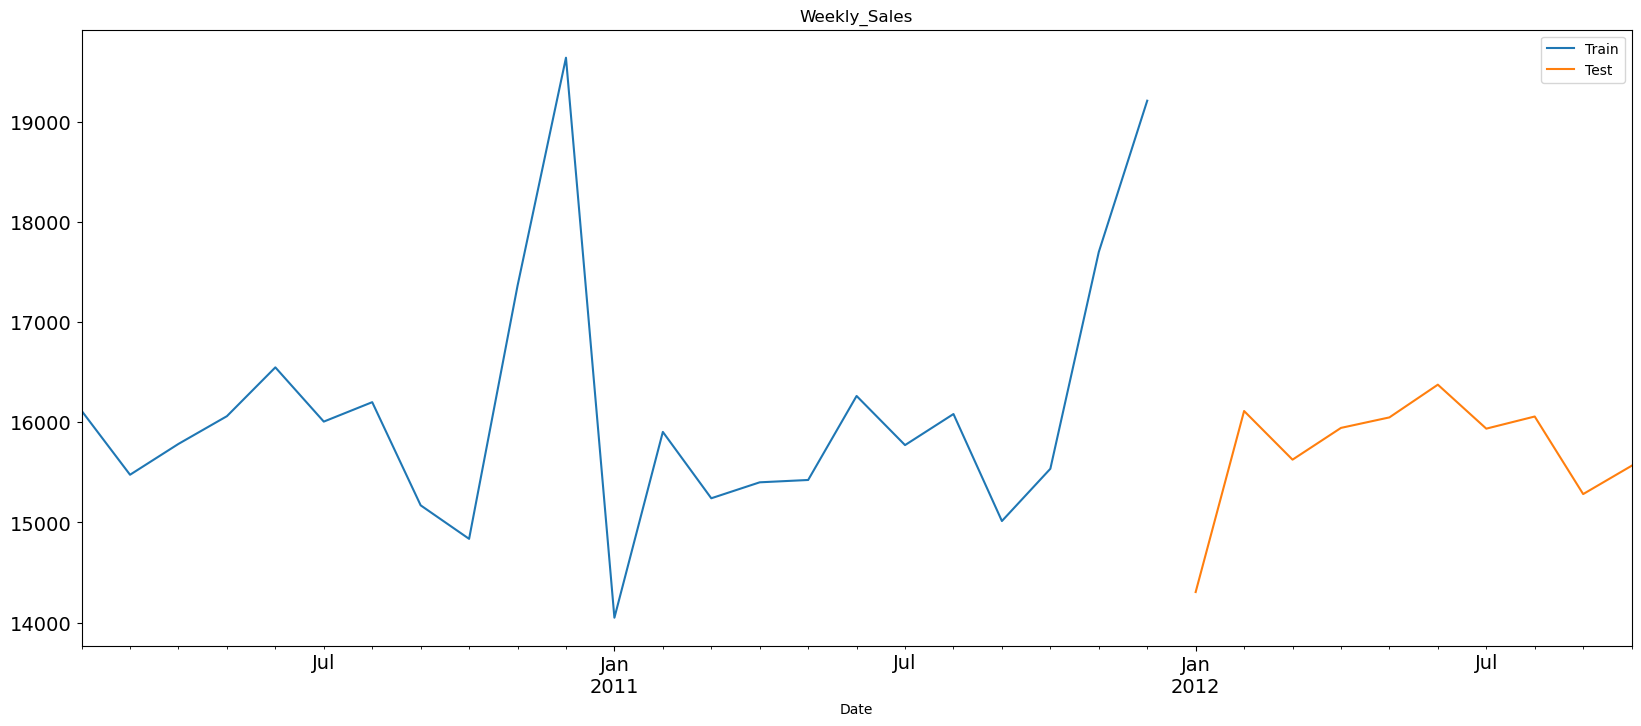

In [228]:
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14, label='Train')
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14, label='Test')
plt.legend()
plt.show()

In [229]:
aa = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, 
                              start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10, 
                              seasonal=True,stepwise=False, suppress_warnings=True, 
                              D=1, max_D=10,error_action='ignore',approximation = False)
aa.fit(train_data)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=398.029, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=399.604, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=399.336, Time=0.29 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=399.847, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=401.739, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=404.410, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=400.484, Time=0.17 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=399.864, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=399.812, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=403.489, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=405.580, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=402.544, Time=0.37 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   :

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [230]:
pred = aa.predict(n_periods=len(test_data))

In [231]:
pred

2012-01-01    16121.961795
2012-02-01    16121.961795
2012-03-01    16121.961795
2012-04-01    16121.961795
2012-05-01    16121.961795
2012-06-01    16121.961795
2012-07-01    16121.961795
2012-08-01    16121.961795
2012-09-01    16121.961795
2012-10-01    16121.961795
Freq: MS, dtype: float64

In [232]:
pred = pd.DataFrame(pred,index = test_data.index,columns=['Prediction'])

In [233]:
pred

,Prediction
Date,
2012-01-01,16121.961795
2012-02-01,16121.961795
2012-03-01,16121.961795
2012-04-01,16121.961795
2012-05-01,16121.961795
2012-06-01,16121.961795
2012-07-01,16121.961795
2012-08-01,16121.961795
2012-09-01,16121.961795


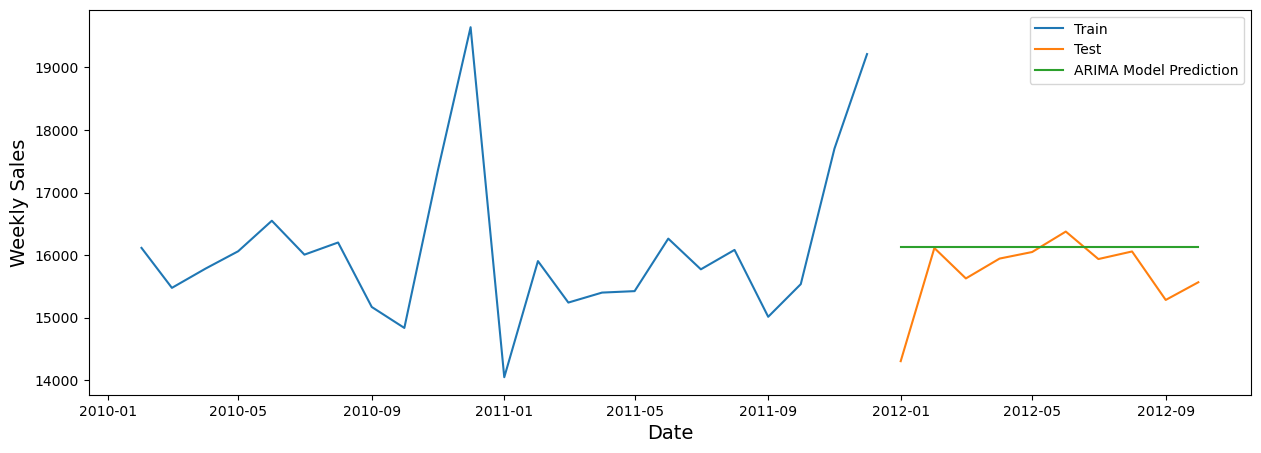

In [234]:
plt.figure(figsize=(15,5))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred, label='ARIMA Model Prediction')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.legend()
plt.show()

In [235]:
print("MSE:", metrics.mean_squared_error(test_data,pred))

MSE: 469971.08318422036


In [236]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_data,pred)))

RMSE: 685.5443699602677


In [237]:
print('MAE:',metrics.mean_absolute_error(test_data,pred))

MAE: 446.99385005214424


In [239]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names = ["Model" ,"Training Accuracy","Testing Accuracy","MSE","RMSE","MAE"]
tb.add_row(["Random Forest", 99.55, 97.67, 12083384.61, 3476.11, 1417.32])
tb.add_row(["XgBoost", 94.46, 94.33, 29495043.80, 5430.93, 3217.01])
tb.add_row(["Extra Trees", 99.59, 97.43, 13332242.34, 3651.33, 1489.12])
tb.add_row(["Multiple Linear Regression", 8.92, 9.04, 473187594.67, 21752.87, 14590.21])
tb.add_row(["Arima","-", "-", 469971.08, 685.54, 446.99])
print(tb)

+----------------------------+-------------------+------------------+--------------+----------+----------+
|           Model            | Training Accuracy | Testing Accuracy |     MSE      |   RMSE   |   MAE    |
+----------------------------+-------------------+------------------+--------------+----------+----------+
|       Random Forest        |       99.55       |      97.67       | 12083384.61  | 3476.11  | 1417.32  |
|          XgBoost           |       94.46       |      94.33       |  29495043.8  | 5430.93  | 3217.01  |
|        Extra Trees         |       99.59       |      97.43       | 13332242.34  | 3651.33  | 1489.12  |
| Multiple Linear Regression |        8.92       |       9.04       | 473187594.67 | 21752.87 | 14590.21 |
|           Arima            |         -         |        -         |  469971.08   |  685.54  |  446.99  |
+----------------------------+-------------------+------------------+--------------+----------+----------+


### Cross-Validation

In [18]:
from sklearn.model_selection import TimeSeriesSplit,cross_val_score

In [17]:
cv=TimeSeriesSplit(n_splits=10)

In [19]:
scores = cross_val_score(rf, x, y, cv = cv)

In [23]:
print("Cross Validation Scores: ", scores)

Cross Validation Scores:  [0.36581115 0.46111931 0.69842702 0.61893673 0.71898625 0.71576812
 0.55500449 0.56221755 0.73802908 0.84961531]


In [24]:
np.mean(scores)

0.6283915011292479

In [240]:
import pickle
pickle.dump(rf, open('rf_model.pkl', 'wb'))